In [ ]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units
import numpy as np
import xarray as xr

## Interpolation in MetPy
There are a number of different interpolations that we might want to do to analyze meteorological data that go beyond what we would individually want to construct in our own code. MetPy offers a number of different interpolation functions depending on what you are attempting to accomplish including:
* `interpolate_to_grid`
* `interpolate_to_isolevel`
* `cross-section`
* `isentropic_interpolation` and `isentropic_interpolation_as_dataset`

Most of these interpolation functions are available in the interpolation portion of the MetPy module, but in this notebook we'll work with the `isentropic_interpolation_as_dataset`, which is available in the calc portion of the module since it is not strictly just a method to interpolate observations to a grid or compute a grid value at a point, but uses grided data and thermodynamic calculations to compute specific isentropic levels.

## Advantages of Isentropic Analysis:  Ch 3 Gary Lackman
* Provides a clear, visual depiction of air parcel motion and 3-D air flow in weather systems, including vertical motions, and moisture transport
* Is conceptually simple, provides explicit representation of vertical motion on horizontal maps
* Adiabatic assumption is quite good much of the time, and even when it is not valid the qualitative answer remains unchanged

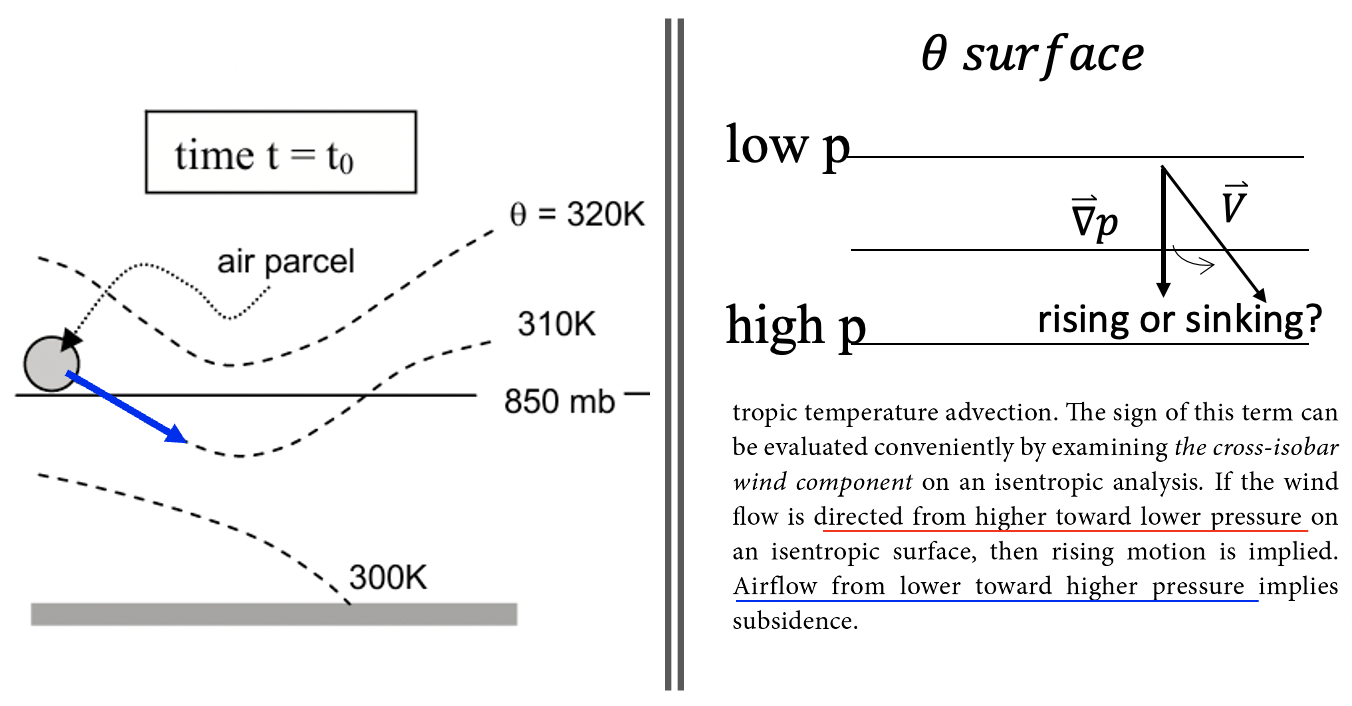

## GFS Data
We'll begin by accessing recent GFS model output, using the F00 time to compute some isentropic levels. This data is coming from the Unidata THREDDS server, which stores approximately two weeks of data on their server at any given time.

https://thredds.ucar.edu/thredds/

In [ ]:
#               yyyy  mm,dd, hh
date = datetime(202#, 11, #, 12)

ds = xr.open_dataset('https://thredds.ucar.edu/thredds/dodsC/grib/NCEP/GFS/'
                     f'Global_0p5deg/GFS_Global_0p5deg_{date:%Y%m%d_%H}00.grib2')

## Subset GFS Data

Here we want to only keep around our needed data to simplify our overall dataset, both in terms of which variables we are keeping around and selecting only the needed lat/lon, and level data that we need to compute our isentropic levels over the CONUS.

To subset variables: use a list of variable names to keep only those variables in your new dataset subset.

To slice dimensions: use a dictionary to set up the slices for the named dimension variables to reduce the total amount of data needing to be downloaded.

In [ ]:
# Subset dataset for only certain variables
# Temperature, RH, u and v wind components
varlist = 
ds_subset = 

In [ ]:
subset = dict(lat=slice(60, 20), lon=slice(360-140, 360-50),
              time=date, vertical=slice(100, None))

tmpk = ds_subset.Temperature_isobaric.metpy.sel(subset)
relh = 
uwnd = 
vwnd = 

In [ ]:
tmpk

## Interpolation to Isentropic Levels
In order to do our interpolation, we'll need to feed our function with the levels we want to compute. A list of values containing one or more isentropic (potential temperature) levels are needed with appropriate units attached. Here we'll set up a NumPy array of values from 285 K to 325 K to feed into our interpolation function.

Using the `isentropic_interpolation_as_dataset` function gives us back a nicely formated xarray Dataset object that will work just like the original GFS dataset that was read in using xarray. This will make our plotting easier in the end. Additionally, there are two required arguments (the isentropic levels and the temperature array), but additional variables can be included for interpolation to the same levels. We'll add relative humidity and the wind components so we can plot all of it on our map.

More information at https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.isentropic_interpolation_as_dataset.html

In [ ]:
# define isentropic levels desired



In [ ]:
isent

## Plotting an Isentropic Map
This is the same as plotting any other variable, except that we'll use the data from our interpolation instead. One of the first things we'll have to do is pull out the data for the level we want to plot (e.g., 303 K) and then proceed to use contours, colorfills, and wind barbs to plot all of the information we desire.

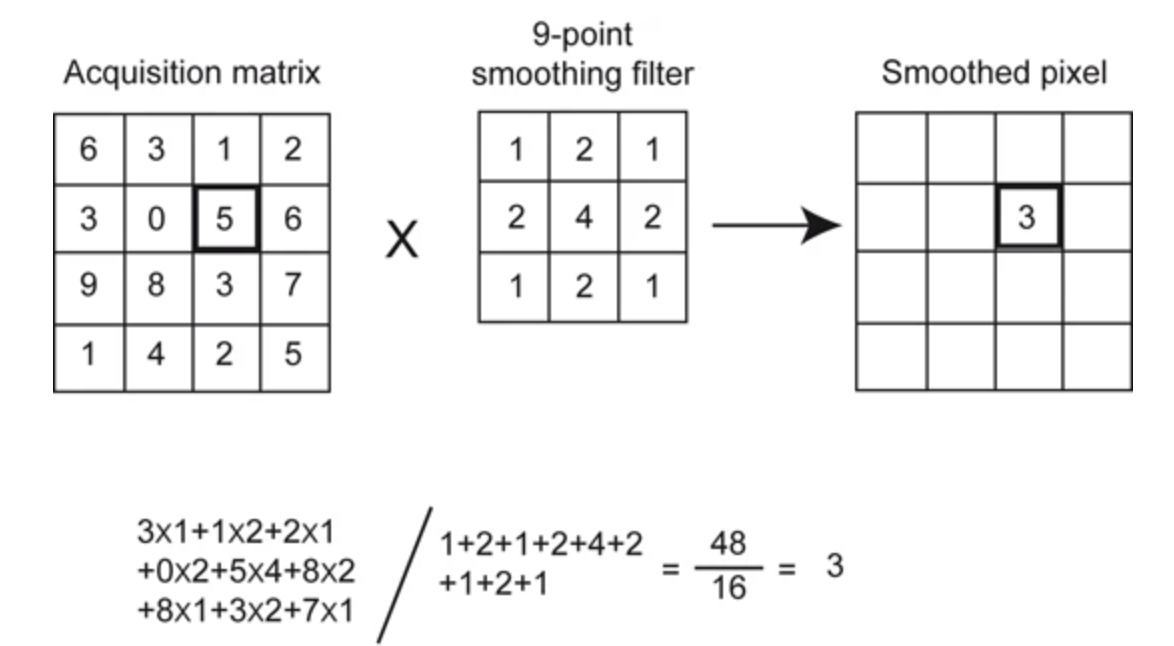

In [ ]:
# Set desired level and subset data accordingly; smooth some fields
level = 
isent_pres = 
isent_relh = 
isent_uwnd = 

In [ ]:
# Isentropic Map
plt.figure(1, figsize=(15, 13))
ax = plt.subplot(111, projection=ccrs.LambertConformal(central_longitude=-100, standard_parallels=(25, 40)))
ax.set_extent([-125, -65, 20, 55], ccrs.PlateCarree())

# Contour Isentropic Level Pressure in black
cs = 


# Colorfill Isentropic Level Relative Humidity in Greens
cf = 

plt.colorbar(cf, orientation='horizontal', pad=0, aspect=50, label='Rel. Hum. (%)')

# Add Isentropic Level wind barbs in knots



# Add Geographic Features
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

# Add titles
plt.title(f'{level.m} K Pressure (hPa), Rel. Hum. (%), Wind Barbs', loc='left')
plt.title(f'Valid: {date}', loc='right')

plt.show()